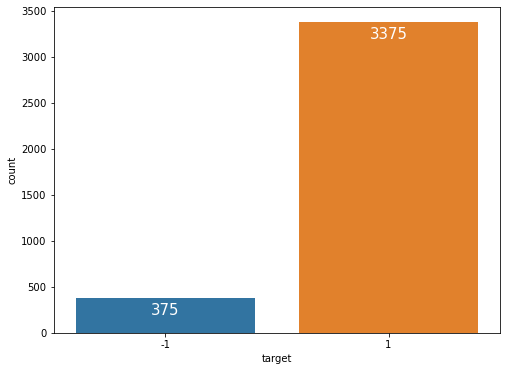

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data_directory_vsc = 'C:/Users/Marta/Desktop/Studia/CDV/IV semestr 2022L/Wykorzystanie Pythona w uczeniu maszynowym/ml_project/project/ML_PROJECT_2022/'
data_directory_colab = '/content/project'

y = pd.read_pickle('{}data/raw/y.pkl'.format(data_directory_colab))

fig = plt.figure(figsize=(8, 6))
ax = sns.countplot(x='target', data=y)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center',
                   size = 15,
                   color='white',
                   xytext = (0, -12), 
                   textcoords = 'offset points')

In [ ]:
import pickle as pkl

# saving figure
with open('/reports/figures/fig_01.png'.format(data_directory_colab), 'wb') as f:
  pkl.dump(fig, f)